# 좌표 명령어

#### 이 섹션에서는 NAO의 몸을 좌표 이동하는 예시를 보여준다.

## 팔

### Trajectory 1

#### almotion_cartesianArm1.py

In [2]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm"""
from naoqi import ALProxy
import qi #pepper와의 연결 및 모듈의 API(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath # Choregraphe의 library를 불러와서 사용

nao_ip = "192.168.0.38"

"""
Use case of transformInterpolations API. 
"""
# Get the services ALMotion & ALRobotPosture.

motion_service = ALProxy("ALMotion",nao_ip,9559)  # naoqi API "ALMotion"을 이용하여 LArm의 trajectory를 계산.
posture_service = ALProxy("ALRobotPosture",nao_ip,9559)

# Wake up robot
motion_service.wakeUp()

# Send robot to Stand Init
posture_service.goToPosture("StandInit", 0.5) # posture & speed


True

In [1]:

effector   = "LArm"
frame      = motion.FRAME_TORSO
axisMask   = almath.AXIS_MASK_VEL 
# Vector of Axis Masks. True for axes that you wish to control. e.g. 7 for position only, 56 for rotation only and 63 for both.n
useSensorValues = False # Sensor의 좌표값을 이용하여 좌표를 구할것 구할것인지(?)

path = []
currentTf = motion_service.getTransform(effector, frame, useSensorValues) # currentTf = [0,~,15] list형태로 반환
targetTf  = almath.Transform(currentTf) # almath의 transform matrix로 변환
                                        # ( [0, 1, 2, 3],
                                        #   [4, 5, 6, 7],
                                        #   [8, 9, 10, 11],
                                        #   [12, 13, 14 ,15])

targetTf.r1_c4 += 0.1 
targetTf.r2_c4 += 0.1 # x 에 대해 3cm 이동, y 에 대해 3cm 이동

path.append(list(targetTf.toVector())) # Convert it to a tuple(targetTf.toVector) -> list
path.append(currentTf)

# Go to the target and back again
times      = [2.0, 4.0] # seconds

# Moves end-effector to the given transforms over time. This is a blocking call.
motion_service.transformInterpolations(effector, frame, path, axisMask, times)



NameError: name 'motion' is not defined

In [12]:

# Go to rest position
motion_service.rest()


Here is the list of the Predefined Postures names:
   - Crouch,
   - LyingBack,
   - LyingBelly,
   - Sit,
   - SitRelax,
   ------------
  ##### for pepper 
   - Stand,      
   - StandInit,
   - StandZero.

### 예시

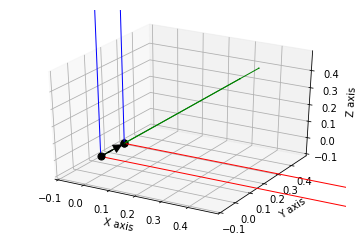

In [3]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm"""

import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
from matplotlib import pyplot as plt
import numpy as np
import drawRobotics as dR

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# pepper_frame
effector   = "LArm"
frame      = motion.FRAME_TORSO
axisMask   = almath.AXIS_MASK_VEL # just control position
useSensorValues = False # Sensor의 좌표값을 이용하여 좌표를 구할것 구할것인지(?)

path = []
p_init = np.array([[1, 0, 0, 0], 
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])

        
targetTf  = almath.Transform(currentTf) # almath의 transform matrix로 변환
targetTf.r2_c4 += 0.14974 # y 에 대해 3cm 이동

p_move=[]
moveTf=[]
Tf_list=list(targetTf.toVector())

for i in range (0,4):
    for j in range (0,4):
        moveTf.append((Tf_list[(4*i)+(j)]))
    p_move += [moveTf]
    moveTf=[]
    
p_moveTf = np.array(p_move)

path.append(list(targetTf.toVector())) # Convert it to a tuple(targetTf.toVector) -> list
path.append(currentTf)

# Go to the target and back again
times      = [2.0, 4.0] # seconds

# Moves end-effector to the given transforms over time. This is a blocking call.
# motion_service.transformInterpolations(effector, frame, path, axisMask, times)


dR.drawPointWithAxis(ax, p_init)
dR.drawVector(ax, p_init, p_moveTf, arrowstyle='-|>')
dR.drawPointWithAxis(ax, p_moveTf)


ax.set_xlim([-0.1,0.5]), ax.set_ylim([-0.1,0.5]), ax.set_zlim([-0.1,0.5])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

### Trajectory 2

almotion_cartesianArm2.py

In [ ]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm"""

import qi
import argparse
import sys
import motion
import almath


def main(session):
    """
    Use transformInterpolations Method on Arm
    """
    # Get the services ALMotion & ALRobotPosture.

    motion_service = session.service("ALMotion")
    posture_service = session.service("ALRobotPosture")

    # Wake up robot
    motion_service.wakeUp()

    # Send robot to Stand Init
    posture_service.goToPosture("StandInit", 0.5)

    effector   = "LArm"
    frame      = motion.FRAME_TORSO
    axisMask   = almath.AXIS_MASK_VEL    # just control position
    useSensorValues = False

    path = []
    currentTf = motion_service.getTransform(effector, frame, useSensorValues)
    # point 1
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 -= 0.05 # y
    path.append(list(targetTf.toVector())) # path에 경로 추가

    # point 2
    targetTf  = almath.Transform(currentTf)
    targetTf.r3_c4 += 0.04 # z
    path.append(list(targetTf.toVector()))

    # point 3
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 += 0.04 # y
    path.append(list(targetTf.toVector()))

    # point 4
    targetTf  = almath.Transform(currentTf)
    targetTf.r3_c4 -= 0.02 # z
    path.append(list(targetTf.toVector()))

    # point 5
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 -= 0.05 # y
    path.append(list(targetTf.toVector()))

    # point 6
    path.append(currentTf)

    times = [0.5, 1.0, 2.0, 3.0, 4.0, 4.5] # seconds

    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # Go to rest position
    motion_service.rest()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--ip", type=str, default="127.0.0.1",
                        help="Robot IP address. On robot or Local Naoqi: use '127.0.0.1'.")
    parser.add_argument("--port", type=int, default=9559,
                        help="Naoqi port number")

    args = parser.parse_args()
    session = qi.Session()
    try:
        session.connect("tcp://" + args.ip + ":" + str(args.port))
    except RuntimeError:
        print ("Can't connect to Naoqi at ip \"" + args.ip + "\" on port " + str(args.port) +".\n"
               "Please check your script arguments. Run with -h option for help.")
        sys.exit(1)
    main(session)



### 발

NAO의 왼쪽 발을 움직인다. 

almotion_cartesianFoot.py

In [ ]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm on Foot"""

import qi
import argparse
import sys
import almath
import motion


def main(session):
    """
    Use transformInterpolations Method on Foot.
    """
    # Get the services ALMotion & ALRobotPosture.

    motion_service = session.service("ALMotion")
    posture_service = session.service("ALRobotPosture")

    # Wake up robot
    motion_service.wakeUp()

    # Send robot to Stand Init
    posture_service.goToPosture("StandInit", 0.5)

    frame      = motion.FRAME_WORLD
    axisMask   = almath.AXIS_MASK_ALL   # full control
    useSensorValues = False

    # Lower the Torso and move to the side
    effector = "Torso"
    initTf   = almath.Transform(
        motion_service.getTransform(effector, frame, useSensorValues))
    deltaTf  = almath.Transform(0.0, -0.06, -0.03) # x, y, z
    targetTf = initTf*deltaTf
    path     = list(targetTf.toVector())
    times    = 2.0 # seconds
    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # LLeg motion
    effector = "LLeg"
    initTf = almath.Transform()

    try:
        initTf = almath.Transform(motion_service.getTransform(effector, frame, useSensorValues))
  
    except Exception, errorMsg:
        print str(errorMsg)
        print "This example is not allowed on this robot."
        exit()

    # rotation Z
    deltaTf  = almath.Transform(0.0, 0.04, 0.0)*almath.Transform().fromRotZ(45.0*almath.TO_RAD)
    targetTf = initTf*deltaTf
    path     = list(targetTf.toVector())
    times    = 2.0 # seconds

    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # Go to rest position
    motion_service.rest()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--ip", type=str, default="127.0.0.1",
                        help="Robot IP address. On robot or Local Naoqi: use '127.0.0.1'.")
    parser.add_argument("--port", type=int, default=9559,
                        help="Naoqi port number")

    args = parser.parse_args()
    session = qi.Session()
    try:
        session.connect("tcp://" + args.ip + ":" + str(args.port))
    except RuntimeError:
        print ("Can't connect to Naoqi at ip \"" + args.ip + "\" on port " + str(args.port) +".\n"
               "Please check your script arguments. Run with -h option for help.")
        sys.exit(1)
    main(session)



## 몸통

NAO의 몸통을 다른자세로 바꾼다.

### Trajectory

In [ ]:
almotion_cartesianTorso.py

#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Torso"""

import qi
import argparse
import sys
import almath
import motion


def main(session):
    """
    Use transformInterpolations Method on Torso.
    """
    # Get the services ALMotion & ALRobotPosture.

    motion_service = session.service("ALMotion")
    posture_service = session.service("ALRobotPosture")

    # Wake up robot
    motion_service.wakeUp()

    # Send robot to Stand Init
    posture_service.goToPosture("StandInit", 0.5)

    effector   = "Torso"
    frame      =  motion.FRAME_WORLD
    axisMask   = almath.AXIS_MASK_ALL # full control
    useSensorValues = False

    # Define the changes relative to the current position
    dx         = 0.045 # translation axis X (meter)
    dy         = 0.050 # translation axis Y (meter)

    path = []
    currentTf = motion_service.getTransform(effector, frame, useSensorValues)

    # point 1
    targetTf  = almath.Transform(currentTf)
    targetTf.r1_c4 += dx
    path.append(list(targetTf.toVector()))

    # point 2
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 -= dy
    path.append(list(targetTf.toVector()))

    # point 3
    targetTf  = almath.Transform(currentTf)
    targetTf.r1_c4 -= dx
    path.append(list(targetTf.toVector()))

    # point 4
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 += dy
    path.append(list(targetTf.toVector()))

    # point 5
    targetTf  = almath.Transform(currentTf)
    targetTf.r1_c4 += dx
    path.append(list(targetTf.toVector()))

    # point 6
    path.append(currentTf)

    times = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0] # seconds

    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # Go to rest position
    motion_service.rest()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--ip", type=str, default="127.0.0.1",
                        help="Robot IP address. On robot or Local Naoqi: use '127.0.0.1'.")
    parser.add_argument("--port", type=int, default=9559,
                        help="Naoqi port number")

    args = parser.parse_args()
    session = qi.Session()
    try:
        session.connect("tcp://" + args.ip + ":" + str(args.port))
    except RuntimeError:
        print ("Can't connect to Naoqi at ip \"" + args.ip + "\" on port " + str(args.port) +".\n"
               "Please check your script arguments. Run with -h option for help.")
        sys.exit(1)
    main(session)

## 팔과 몸통

여러 개의 이펙터를 좌표 명령으로 움직일 수 있다.

### Trajectory 1

almotion_cartesianTorsoArm1.py



In [4]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm and Torso"""

import qi
import argparse
import sys
import almath
import motion


    """
    Use transformInterpolations Method on Arm and Torso
    """
    # Get the services ALMotion & ALRobotPosture.

    motion_service = session.service("ALMotion")
    posture_service = session.service("ALRobotPosture")

    # Wake up robot
    motion_service.wakeUp()

    # Send robot to Stand Init
    posture_service.goToPosture("StandInit", 0.5)

    frame      = motion.FRAME_WORLD
    coef       = 0.5                   # motion speed
    times      = [coef, 2.0*coef, 3.0*coef, 4.0*coef]
    useSensorValues = False

    # Relative movement between current and desired positions
    dy         = + 0.03                 # translation axis Y (meters)
    dz         = - 0.03                 # translation axis Z (meters)
    dwx        = + 8.0 * almath.TO_RAD   # rotation axis X (radians)

    # Motion of Torso with _async process
    effector   = "Torso"

    path = []
    initTf = almath.Transform(motion_service.getTransform(effector, frame, useSensorValues))
    
    # point 1
    deltaTf  = almath.Transform(0.0, -dy, dz)*almath.Transform().fromRotX(-dwx)
    targetTf = initTf*deltaTf
    path.append(list(targetTf.toVector()))

    # point 2
    path.append(list(initTf.toVector()))

    # point 3
    deltaTf  = almath.Transform(0.0, dy, dz)*almath.Transform().fromRotX(dwx)
    targetTf = initTf*deltaTf
    path.append(list(targetTf.toVector()))

    # point 4
    path.append(list(initTf.toVector()))

    axisMask   = almath.AXIS_MASK_ALL  # control all the effector axes
    motion_service.transformInterpolations(effector, frame, path,
                                           axisMask, times, _async=True)

    # Motion of Arms with block process
    frame     = motion.FRAME_TORSO
    axisMask  = almath.AXIS_MASK_VEL  # control just the position
    times     = [1.0*coef, 2.0*coef]  # seconds

    # Motion of Right Arm during the first half of the Torso motion
    effector  = "RArm"

    path = []
    currentTf = motion_service.getTransform(effector, frame, useSensorValues)
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 -= 0.04 # y
    path.append(list(targetTf.toVector()))
    path.append(currentTf)

    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # Motion of Left Arm during the last half of the Torso motion
    effector   = "LArm"

    path = []
    currentTf = motion_service.getTransform(effector, frame, useSensorValues)
    targetTf  = almath.Transform(currentTf)
    targetTf.r2_c4 += 0.04 # y
    path.append(list(targetTf.toVector()))
    path.append(currentTf)

    motion_service.transformInterpolations(effector, frame, path, axisMask, times)

    # Go to rest position
    motion_service.rest()
    
"""
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--ip", type=str, default="127.0.0.1",
                        help="Robot IP address. On robot or Local Naoqi: use '127.0.0.1'.")
    parser.add_argument("--port", type=int, default=9559,
                        help="Naoqi port number")

    args = parser.parse_args()
    session = qi.Session()
    try:
        session.connect("tcp://" + args.ip + ":" + str(args.port))
    except RuntimeError:
        print ("Can't connect to Naoqi at ip \"" + args.ip + "\" on port " + str(args.port) +".\n"
               "Please check your script arguments. Run with -h option for help.")
        sys.exit(1)
    main(session)
"""

'\nif __name__ == "__main__":\n    parser = argparse.ArgumentParser()\n    parser.add_argument("--ip", type=str, default="127.0.0.1",\n                        help="Robot IP address. On robot or Local Naoqi: use \'127.0.0.1\'.")\n    parser.add_argument("--port", type=int, default=9559,\n                        help="Naoqi port number")\n\n    args = parser.parse_args()\n    session = qi.Session()\n    try:\n        session.connect("tcp://" + args.ip + ":" + str(args.port))\n    except RuntimeError:\n        print ("Can\'t connect to Naoqi at ip "" + args.ip + "" on port " + str(args.port) +".\n"\n               "Please check your script arguments. Run with -h option for help.")\n        sys.exit(1)\n    main(session)\n'

## 예제

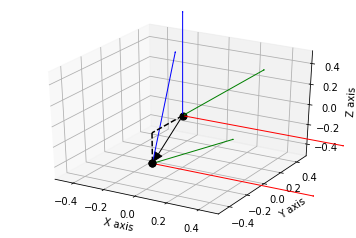

In [15]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm and Torso"""

import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
from matplotlib import pyplot as plt
import numpy as np
import drawRobotics as dR

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

frame      = motion.FRAME_WORLD
coef       = 0.5                   # motion speed
times      = [coef, 2.0*coef, 3.0*coef, 4.0*coef]
useSensorValues = False

# Relative movement between current and desired positions
dy         = + 0.33                 # translation axis Y (meters)
dz         = - 0.3                 # translation axis Z (meters)
dwx        = + 15.0 * almath.TO_RAD   # rotation axis X (radians)

# Motion of Torso with _async process
effector   = "Torso"

path = []


p_init = np.array([[1, 0, 0, 0],  #  initTf = almath.Transform(motion_service.getTransform(effector, frame, useSensorValues))
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])

        
    
# point 1
p_move = []
moveTf=[]
deltaTf  = almath.Transform(0.0, -dy, dz)*almath.Transform().fromRotX(-dwx)
deltaTf_vec = list(deltaTf.toVector())

for i in range (0,4):
    for j in range (0,4):
        moveTf.append((deltaTf_vec[(4*i)+(j)]))
    p_move += [moveTf]
    moveTf=[]
p_moveTf = np.array(p_move)
targetTf = np.dot(p_init, p_moveTf)



dR.drawPointWithAxis(ax, p_init)
dR.drawVector(ax, p_init, targetTf, arrowstyle='-|>')
dR.drawPointWithAxis(ax, targetTf)


ax.set_xlim([-0.5,0.5]), ax.set_ylim([-0.5,0.5]), ax.set_zlim([-0.5,0.5])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

